In [1]:
#Required imports

#Import and handling data 
import miepython
import os
from os.path import isfile, join
import importlib
import pandas as pd
from importlib_resources import files

#Data treatment and mathematics
#import numpy as np
from scipy.optimize import curve_fit

#Data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib import rc,rcParams

from module import *

In [2]:
#Default parameters for data visualization
rcParams['figure.figsize'] = [8,6]
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 12
rcParams['xtick.major.width'] = 1.5
rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 16
rcParams['ytick.major.width'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['lines.linewidth'] = 2
rcParams['lines.markersize'] = 10
rcParams['axes.titlesize'] = 25
rcParams['axes.labelsize'] = 25
rcParams['legend.fontsize'] = 18
rcParams['legend.frameon'] = False
rc('text', usetex = 'False')
rc('font', family = 'serif')

In [3]:
from os import listdir
files = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]
experimental_files = []
reference_files = []
for file in files:

    if (file[-4:] == '.dat'):
        if 'ATR' in file:
            experimental_files.append(file)
    elif (file[-4:] == '.csv'):
        if ("spectrochimica" in file):
            reference_files.append(file)
print(experimental_files)

['ATR_absorbance_delta_Al2O3_NPs_.dat', 'ATR_absorbance_gamma_Al2O3_NPs.dat']


In [4]:
experimental_df = pd.DataFrame()
reference_df = pd.DataFrame()
for i in range(len(experimental_files)):
    df = pd.read_csv(experimental_files[i], delimiter='\t')
    if (i==0):
        experimental_df['x']        =df.iloc[:,0]
        experimental_df[experimental_files[i][:-4].split('_')[1]+'_'+experimental_files[i].split('_')[2]] = df.iloc[:,1]

    else:
        experimental_df[experimental_files[i][:-4].split('_')[1]+'_'+experimental_files[i].split('_')[2]]= df.iloc[:,1]

print(experimental_df)

for i in range(len(reference_files)):
    df_reference = pd.read_csv(reference_files[i], delimiter=',')

               x  absorbance_delta  absorbance_gamma
0      100.28193           0.14292           0.35927
1      100.76406           0.15412           0.36674
2      101.24618           0.16530           0.37321
3      101.72831           0.17522           0.37436
4      102.21043           0.18266           0.36692
...          ...               ...               ...
8085  3998.25900           0.00133           0.00376
8086  3998.74113           0.00134           0.00377
8087  3999.22325           0.00134           0.00378
8088  3999.70538           0.00134           0.00379
8089  4000.18750           0.00134           0.00380

[8090 rows x 3 columns]


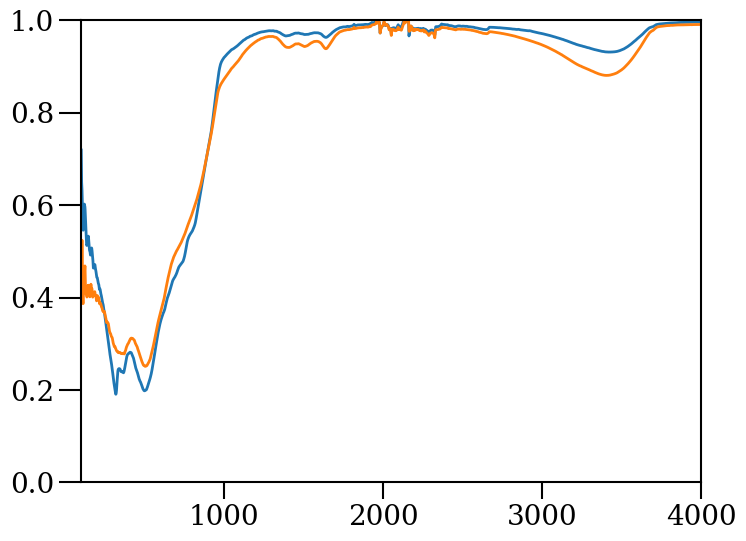

In [5]:
delta_R = A_to_R(experimental_df['absorbance_delta'],theta=45)
gamma_R = A_to_R(experimental_df['absorbance_gamma'],theta=45)
plt.ylim(0,1)
plt.xlim(100,4000)
plt.plot(experimental_df['x'],delta_R)
plt.plot(experimental_df['x'],gamma_R)

Text(0, 0.5, 'Reflectance')

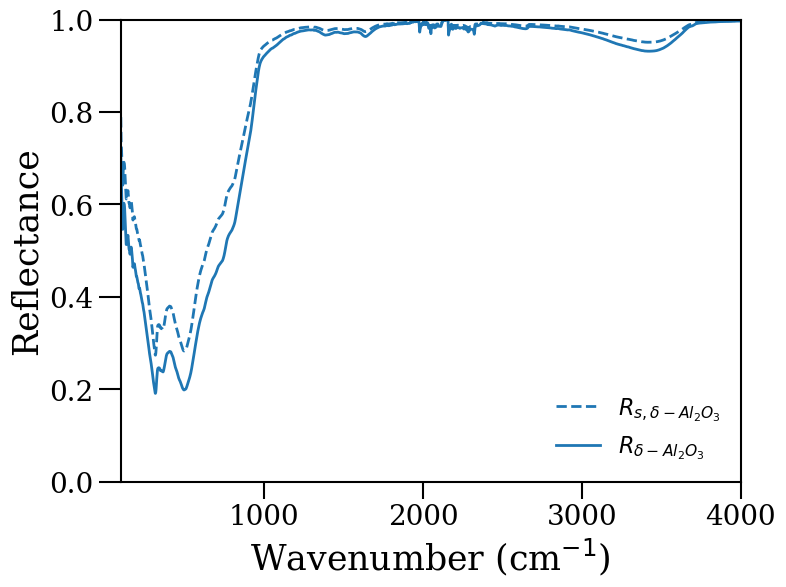

In [6]:
f_s=0.584    
phi_rad = get_pol_angle(f_s) 

phi_deg = phi_rad*180/np.pi

delta_R_S = R_S_45(phi_rad,delta_R)
gamma_R_S = R_S_45(phi_rad,gamma_R)

plt.plot(experimental_df['x'],delta_R_S,c='C0',lw=2,label=r'$R_{s, \delta-Al_2O_3}$',ls ='--')
plt.plot(experimental_df['x'],delta_R,c='C0',lw=2,label=r'$R_{\delta-Al_2O_3}$')

plt.legend(fontsize=16,frameon=False)
plt.xlim(100,4000)
plt.ylim(0,1)

plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflectance')

In [7]:
n_IRE=2.4
f_s = 0.584
eps_inf_np = 2.4
s = [0]
f = [0.36]
results_delta = {}
for i in range(len(s)):
    eps = extract_eps_NP(delta_R, experimental_df['x'], f_s, f[0],eps_inf_np, s[i], n_IRE)
    results_delta[f[i]] = eps

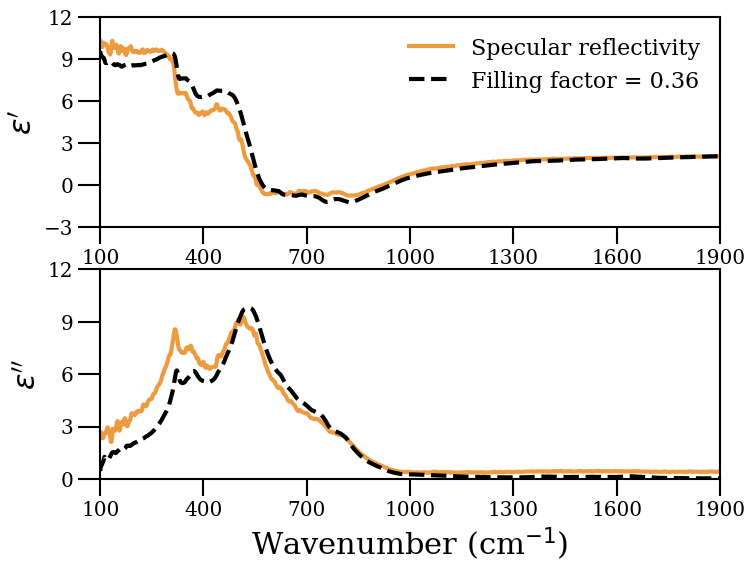

In [8]:
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec
params = {'legend.fontsize': 16,
          'figure.figsize': (8, 6),
         'axes.labelsize': 16,
         'axes.titlesize':16,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

df_save = pd.DataFrame()
pl.rcParams.update(params)
gs = gridspec.GridSpec(2, 1, height_ratios = [1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0)
plt.xlim((100,1900))
ax0.set_xticks([100,400,700,1000,1300,1600,1900])
ax0.set_yticks([-3,0,3,6,9,12])
ax1.set_yticks([0,3,6,9,12])
ax0.set_ylim(-3,12)
ax1.set_ylim(0,12)

ax0.plot(df_reference['W / cm-1'],df_reference['Eps KKG Delta Real'],c='#EE9A3F',lw=3,label =r"Specular reflectivity", )
ax1.plot(df_reference['W / cm-1'],df_reference['Eps KKG Delta Imag'],c='#EE9A3F',lw=3)
ax0.plot(experimental_df['x'],results_delta[0.36].to_numpy().real,lw=3,label ='Filling factor = ' + str(0.36), ls = '--', color = 'black')
ax1.plot(experimental_df['x'],results_delta[0.36].to_numpy().imag,lw=3,label =str(0.36), ls = '--', color='black')
ax1.set_xlabel('Wavenumber (cm$^{-1}$)', fontsize=22)
ax1.set_ylabel(r'$\varepsilon^{\prime\prime}$', fontsize=22)
ax0.set_ylabel(r'$\varepsilon^{\prime}$', fontsize=22)
ax0.legend(loc='best')
